In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

### Training Image Preprocessing

In [4]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70296 files belonging to 38 classes.


### Validation Image Preprocessing

In [4]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[104.75  97.5   96.  ]
   [202.5  194.5  191.5 ]
   [202.75 194.75 191.75]
   ...
   [187.   177.   175.  ]
   [189.25 179.25 177.25]
   [189.5  179.5  177.5 ]]

  [[103.75  96.75  95.25]
   [201.5  193.5  190.5 ]
   [203.25 195.25 192.25]
   ...
   [193.75 183.75 181.75]
   [198.   188.   186.  ]
   [198.5  188.5  186.5 ]]

  [[106.    98.25  96.75]
   [202.5  194.5  191.5 ]
   [200.75 192.75 189.75]
   ...
   [189.25 179.25 177.25]
   [194.25 184.25 182.25]
   [194.   184.   182.  ]]

  ...

  [[ 21.25  15.25   9.25]
   [ 45.    37.    26.  ]
   [ 51.75  43.75  32.75]
   ...
   [185.   174.   168.  ]
   [180.   169.   163.  ]
   [180.75 169.75 163.75]]

  [[ 23.5   15.75   9.5 ]
   [ 44.25  36.25  25.25]
   [ 59.75  49.75  39.75]
   ...
   [181.75 170.75 164.75]
   [176.   165.   159.  ]
   [176.25 165.25 159.25]]

  [[ 25.    17.25  11.25]
   [ 51.    43.    32.  ]
   [ 57.5   47.5   37.5 ]
   ...
   [178.75 167.75 161.75]
   [185.5  174.5  168.5 ]
   [178.   167.   16

### Building Model

In [7]:
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model=Sequential()

### Building Convolution Layer

In [9]:
model.add(Input(shape=(128, 128, 3))) 
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#output layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

### Model Training 

In [21]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 5001s 2s/step - loss: 1.3064 - accuracy: 0.6159 - val_loss: 0.5515 - val_accuracy: 0.8258
Epoch 2/10
2197/2197 [==============================] - 3536s 2s/step - loss: 0.4290 - accuracy: 0.8636 - val_loss: 0.2878 - val_accuracy: 0.9087
Epoch 3/10
2197/2197 [==============================] - 3363s 2s/step - loss: 0.2549 - accuracy: 0.9169 - val_loss: 0.1759 - val_accuracy: 0.9454
Epoch 4/10
2197/2197 [==============================] - 3366s 2s/step - loss: 0.1779 - accuracy: 0.9418 - val_loss: 0.1533 - val_accuracy: 0.9527
Epoch 5/10
2197/2197 [==============================] - 3370s 2s/step - loss: 0.1329 - accuracy: 0.9576 - val_loss: 0.1828 - val_accuracy: 0.9455
Epoch 6/10
2197/2197 [==============================] - 3384s 2s/step - loss: 0.1036 - accuracy: 0.9657 - val_loss: 0.2477 - val_accuracy: 0.9268
Epoch 7/10
2197/2197 [==============================] - 3379s 2s/step - loss: 0.0845 - accuracy: 0.9725 - val_loss: 0.1121 -

### Model Evaluation

In [1]:
#Model evaluaion on training set

train_loss,train_acc=model.evaluate(training_set)

NameError: name 'model' is not defined

In [2]:
print(train_loss,train_acc)

NameError: name 'train_loss' is not defined

In [24]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 174s 316ms/step - loss: 0.1145 - accuracy: 0.9667


In [25]:
print(val_loss,val_acc)

0.11446583271026611 0.9667084217071533


### Saving Model

In [26]:
model.save("training_model.keras")

In [27]:
training_history.history

{'loss': [1.3063782453536987,
  0.4290153384208679,
  0.2548561096191406,
  0.17788763344287872,
  0.13293594121932983,
  0.10361252725124359,
  0.08447187393903732,
  0.0677407830953598,
  0.05885292589664459,
  0.05418263375759125],
 'accuracy': [0.615861713886261,
  0.8635891675949097,
  0.9168930649757385,
  0.9418308734893799,
  0.9575787782669067,
  0.9657158851623535,
  0.9725158214569092,
  0.9776939749717712,
  0.9803400039672852,
  0.9826303720474243],
 'val_loss': [0.551487922668457,
  0.2878265380859375,
  0.17587999999523163,
  0.15326304733753204,
  0.1827569454908371,
  0.24773073196411133,
  0.11209315061569214,
  0.16075897216796875,
  0.1371791809797287,
  0.11446578055620193],
 'val_accuracy': [0.8258023858070374,
  0.9087184071540833,
  0.9454245567321777,
  0.9526519179344177,
  0.945538341999054,
  0.926815390586853,
  0.9683587551116943,
  0.9537901282310486,
  0.9625540375709534,
  0.9667084217071533]}

In [28]:
import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

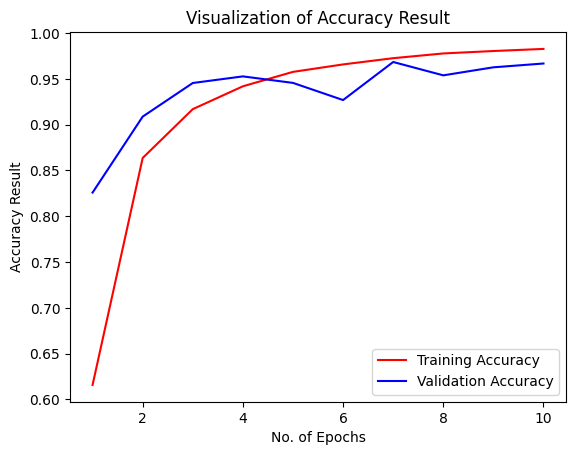

In [30]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show

### Some other metrics for evaluation

In [31]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [32]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 170s 309ms/step


(array([[1.0000000e+00, 8.5072140e-12, 1.4214595e-12, ..., 5.9120930e-16,
         6.8036055e-17, 3.3280030e-17],
        [1.0000000e+00, 1.9571536e-12, 3.1962534e-12, ..., 3.0910191e-17,
         2.0531576e-16, 1.5664635e-18],
        [1.0000000e+00, 1.5303387e-12, 1.1729994e-13, ..., 3.8608842e-20,
         2.6175049e-18, 1.5053330e-18],
        ...,
        [4.2788376e-08, 5.7030525e-10, 2.1270284e-06, ..., 2.5483963e-08,
         6.0021681e-09, 9.9965262e-01],
        [2.7798671e-11, 1.0167836e-12, 1.9449939e-09, ..., 4.6703783e-11,
         6.3124554e-11, 9.9999928e-01],
        [2.3204052e-18, 1.1098697e-18, 1.3043545e-16, ..., 6.1722967e-17,
         5.4274996e-15, 9.9999988e-01]], dtype=float32),
 (17572, 38))

In [36]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [37]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [38]:
true_category=tf.concat([y for x,y in test_set],axis=0)
true_category

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
Y_true=tf.argmax(true_category,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       1.00      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.90      0.94       440
                                   Apple___healthy       0.96      0.97      0.97       502
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.95      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

In [42]:
cm=confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

### Confusion Matrix Visualization

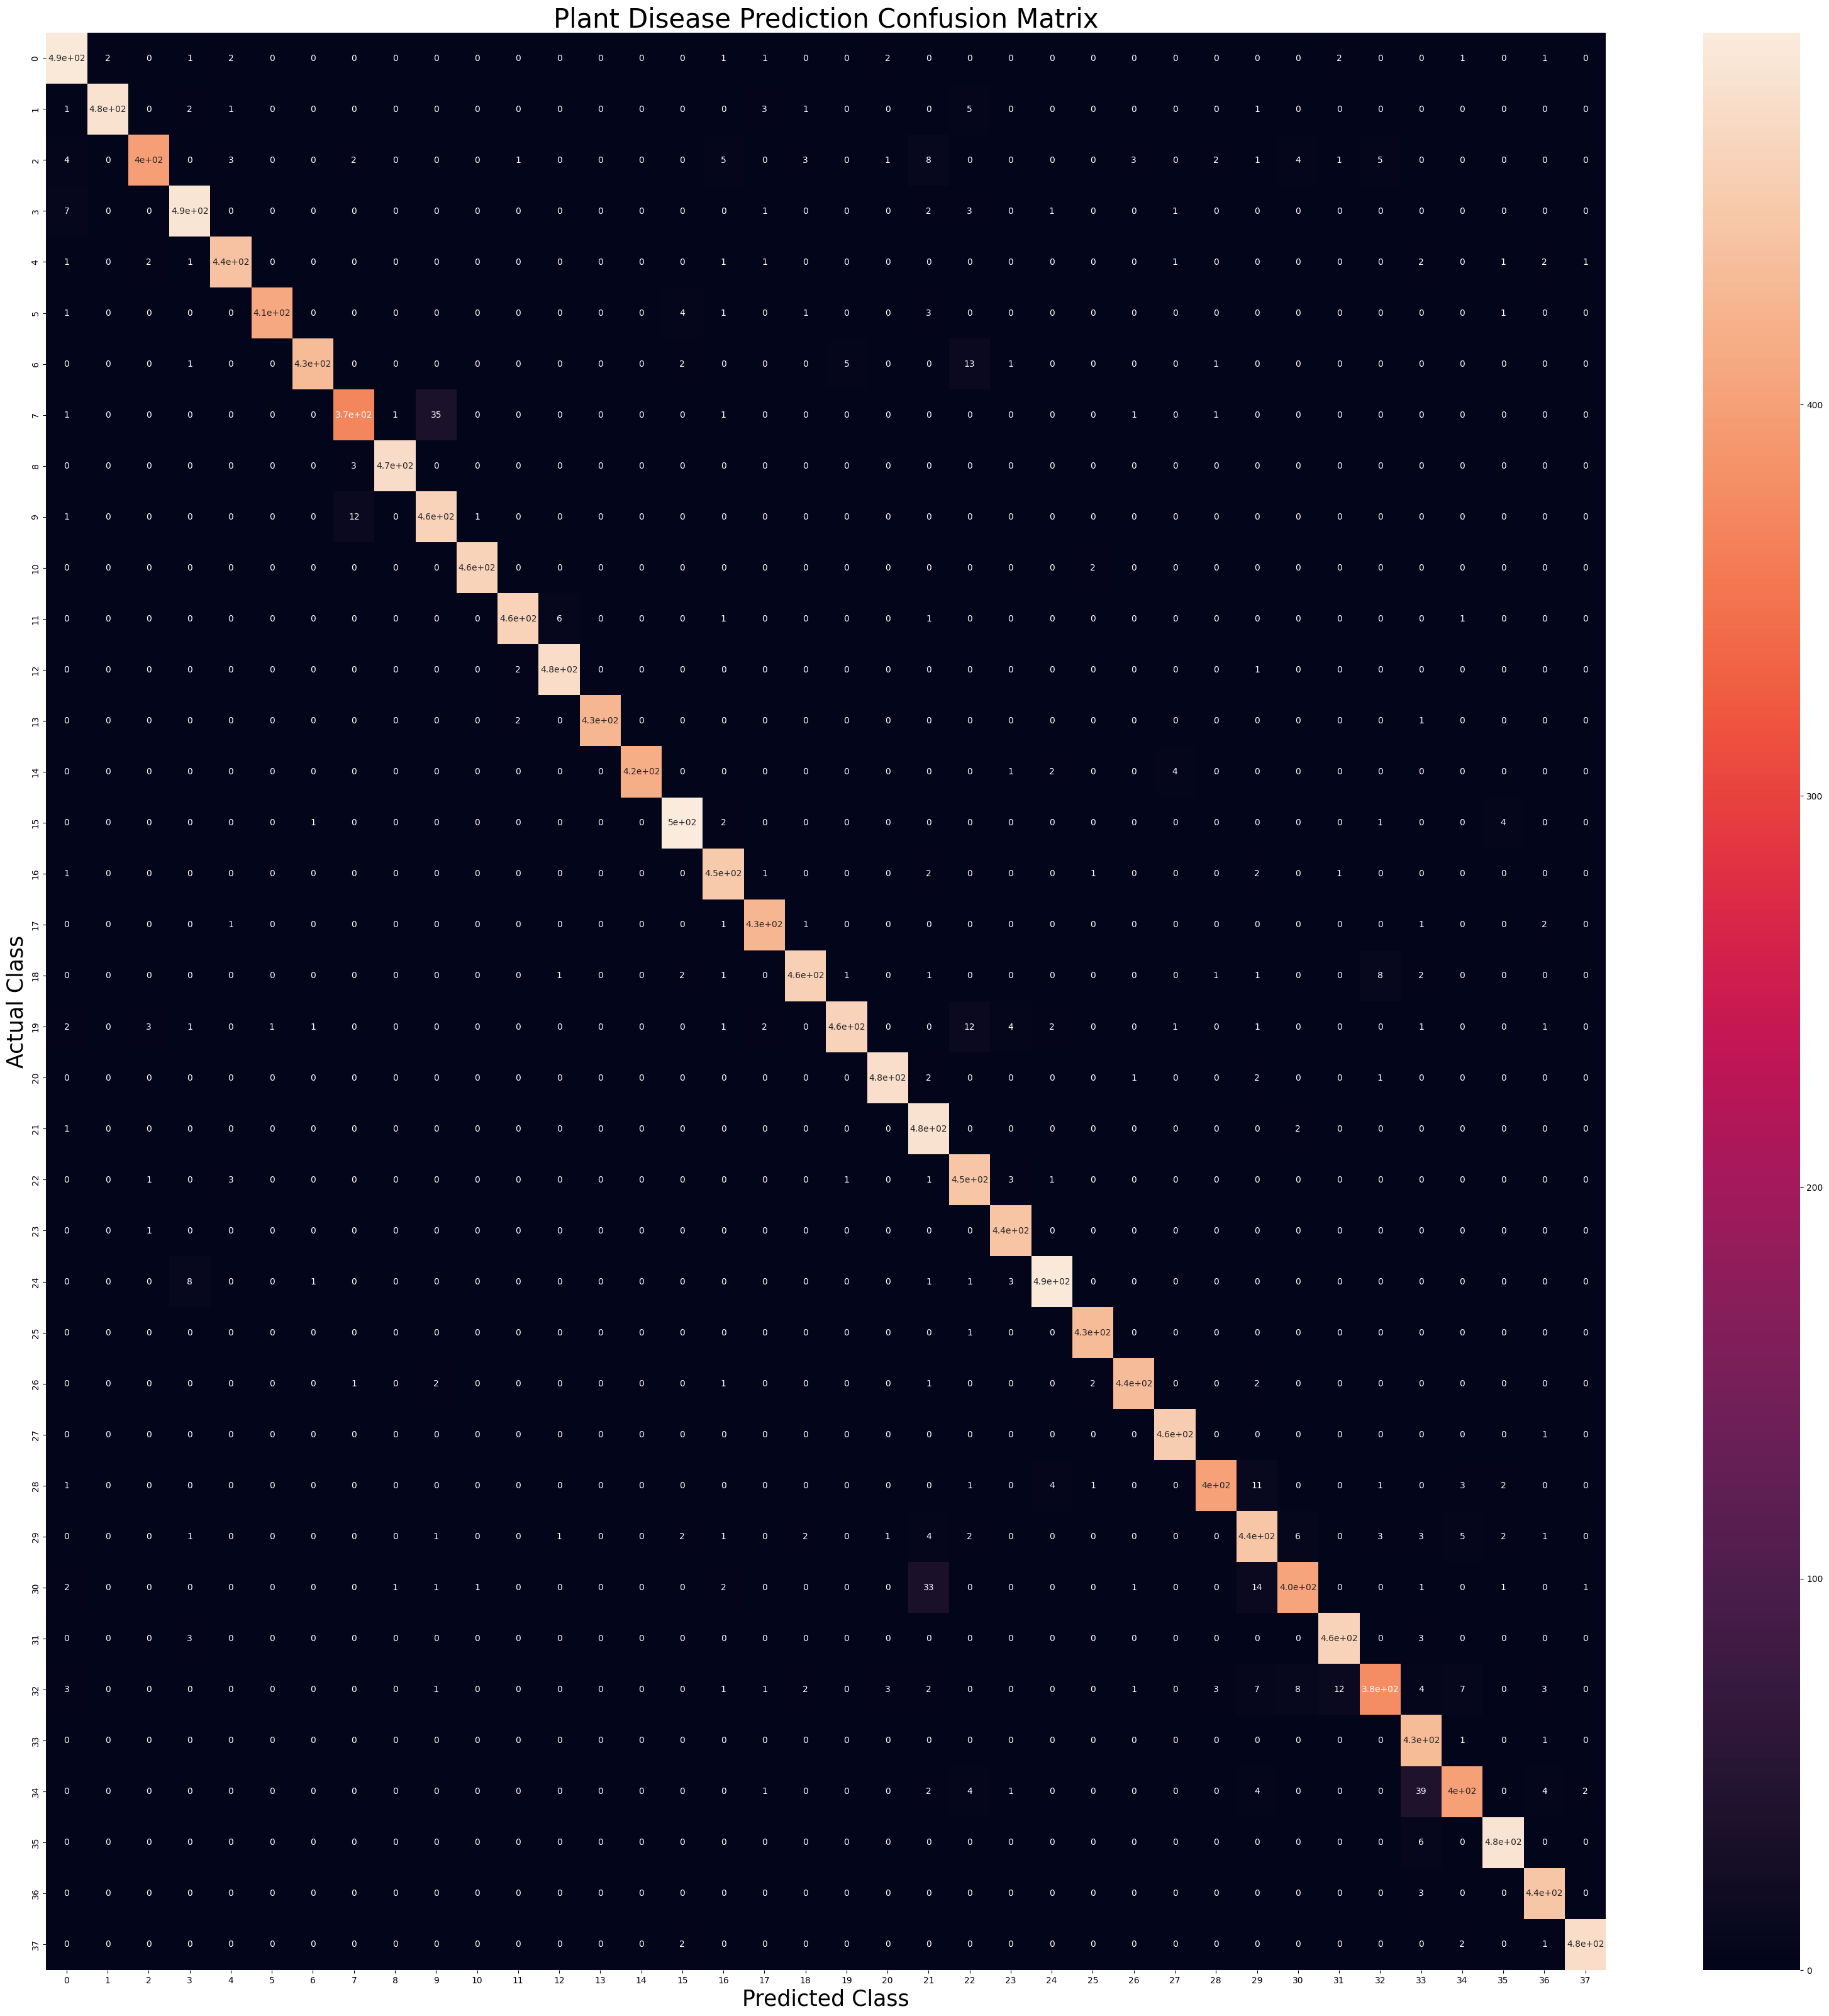

In [43]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True, annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=25)
plt.ylabel("Actual Class",fontsize=25)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=30)
plt.show()